<a href="https://colab.research.google.com/github/YolandaZhao10/CSCI-6170-Project-in-AI-and-ML/blob/main/hw1/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Advanced Objective Function and Use Case

# Task 1.1

## Model Assumption
Given a binary classification dataset
$\mathscr D =\{(x_i,y_i)\}_{i=1}^N,\quad
x_i\in\mathbb R^d,\; y_i\in\{0,1\}$,
logistic regression models the conditional probability as
$$
p(y_i=1\mid x_i;w)=\sigma(w^\top x_i),
\quad
\sigma(z)=\frac{1}{1+e^{-z}}.
$$

Base on probability for $y_i = 1$, we can also get conditional probability for $y_i = 0$.

$$
p(y_i=0\mid x_i;w)=1-\sigma(w^\top x_i).
$$



## Maximum Likelihood Estimation
Each label $y_i$ is assumed to follow a Bernoulli distribution. The conditional likelihood can be written compactly as

$$
p(y_i\mid x_i;w)
=\sigma(w^\top x_i)^{y_i}
\left(1-\sigma(w^\top x_i)\right)^{1-y_i}.
$$

Assuming the samples are i.i.d., the likelihood over the entire dataset is

$$
\mathscr{L}(w)
=\prod_{i=1}^N p(y_i\mid x_i;w)
=\prod_{i=1}^N
\sigma(w^\top x_i)^{y_i}
\left(1-\sigma(w^\top x_i)\right)^{1-y_i}.
$$

Then, we can taking the logarithm of the likelihood yields the log-likelihood:

$$
\ell(w)
=\log \mathscr{L}(w)
=\sum_{i=1}^N
\Big[
y_i \log \sigma(w^\top x_i)
+(1-y_i)\log\left(1-\sigma(w^\top x_i)\right)
\Big].
$$

Maximum Likelihood Estimation seeks the parameter $w$ that maximizes the log-likelihood:

$$
w_{\text{MLE}}=\arg\max_w \ell(w).
$$


## Get Objective Function of Logistic Regression Under MLE
Maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood. Therefore, the objective function of logistic regression under MLE is

$$
J_{\text{MLE}}(w)
=-\ell(w)
=\sum_{i=1}^N
\Big[
- y_i \log \sigma(w^\top x_i)
-(1-y_i)\log\left(1-\sigma(w^\top x_i)\right)
\Big].
$$

This objective function is known as the **logistic loss** or **binary cross-entropy loss**.

## MLE vs. MAP for Logistic Regression


**Definition**: Given a dataset$
\mathscr{D}=\{(x_i,y_i)\}_{i=1}^N \quad y_i\in\{0,1\},
$ Logistic Regression models $
p(y_i=1\mid x_i;w)=\sigma(w^\top x_i),\quad
\sigma(z)=\frac{1}{1+e^{-z}}$.

### Objective
- **MLE:** maximize likelihood $p(\mathscr{D}\mid w)$  
- **MAP:** maximize posterior $p(w\mid\mathscr{D}) \propto p(\mathscr{D}\mid w)p(w)$ -> MAP can be interpreted as **MLE + regularization**.

### Regularization
- **MLE:** no explicit regularization term  
- **MAP:** adds prior-based regularization ($-\log p(w)$)

### When it helps
- **MLE:** works well with large datasets  
- **MAP:** often better for small datasets / high-dimensional features because priors reduce overfitting


### Reference
[1] S. Aswani, “IEOR 165 – Lecture 8: Regularization (Maximum A Posteriori Estimation),” University of California, Berkeley. [Online]. Available: https://aswani.ieor.berkeley.edu/teaching/SP16/165/lecture_notes/ieor165_lec8.pdf


[2] A. Ng, “CS229 Lecture Notes: Logistic Regression,” Stanford University. [Online]. Available: https://cs229.stanford.edu/notes2020spring/cs229-notes1.pdf

[3] X. Fern, “Logistic Regression,” Oregon State University, CS534 Lecture Notes. [Online]. Available: https://web.engr.oregonstate.edu/~xfern/classes/cs534-18/Logistic-Regression-3-updated.pdf


# Task 1.2

## Define a machine learning problem you wish to solve using Logistic Regression.
As someone interested in healthcare prediction tasks, I chose to work with heart disease risk prediction, a domain where classification models can provide practical value for early screening and preventive medicine. In this project, we use the **Framingham Heart Study dataset**, which contains historical patient health records collected from a large-scale cardiovascular study. Each record includes medical and lifestyle measurements such as age, blood pressure, cholesterol level, BMI, smoking status, glucose level, and diabetes-related indicators.

The goal of this project is to solve a **binary classification** problem: predicting whether an individual will develop **coronary heart disease within the next 10 years** (`TenYearCHD = 1/0`) based on the health conditions measured at the current time. To address this, we apply **logistic regression**, which is a suitable model because the prediction target is binary and logistic regression naturally outputs a probability value $P(y=1\mid x)$ through a sigmoid activation function applied to a linear combination of the input features. This probability can then be compared against a threshold to determine the predicted class. In addition to being computationally efficient, logistic regression also provides interpretable feature coefficients, allowing us to understand which health factors are most strongly associated with long-term heart disease risk.


**Goal**: Predict whether a patient will develop coronary heart disease within the next 10 years using historical health measurements.

**Dataset (X, y)**: Using the Framingham dataset (loaded locally as `framingham.csv`).

**Target variable (y)**: The dataset provides a binary label: `TenYearCHD ∈ {1, 0}` We define:  
$$
y_i =
\begin{cases}
1, & \text{if TenYearCHD = 1}\\
0, & \text{if TenYearCHD = 0}
\end{cases}
$$
So: $y = \texttt{TenYearCHD}$


**Number of features**: The raw dataset contains 15 predictor features in total. Below are the features used to form $x_i$, each describing a medical, demographic, or lifestyle factor that may influence long-term heart disease risk:

For each observation $i$, we define the feature vector $x_i$ using patient-related medical and lifestyle measurements from the same record.

A typical choice of $X$ is:  
$$
x_i = [\text{male},\text{age},\text{education},\text{currentSmoker},\text{cigsPerDay},
\text{BPMeds},\text{prevalentStroke},\text{prevalentHyp},\text{diabetes},
\text{totChol},\text{sysBP},\text{diaBP},\text{BMI},\text{heartRate},\text{glucose}]
$$

- **`male`**: Binary indicator of biological sex (1 = male, 0 = female). Sex is an important cardiovascular risk factor.
- **`age`**: Age of the patient (in years). Risk of coronary heart disease generally increases as age increases.
- **`education`**: Education level (categorical encoded as integer levels). It can serve as a proxy for socioeconomic status and related health behaviors.
- **`currentSmoker`**: Binary indicator of whether the person currently smokes (1 = yes, 0 = no). Smoking is strongly associated with cardiovascular disease.
- **`cigsPerDay`**: Average number of cigarettes smoked per day. This reflects smoking intensity and contributes to risk severity.

- **`BPMeds`**: Binary indicator of whether the patient is taking blood pressure medication. This suggests a prior blood pressure condition and treatment history.
- **`prevalentStroke`**: Binary indicator of whether the patient has had a stroke previously. Past stroke history signals higher cardiovascular vulnerability.
- **`prevalentHyp`**: Binary indicator of whether the patient has hypertension (high blood pressure). Hypertension is one of the strongest contributors to CHD.
- **`diabetes`**: Binary indicator of whether the patient has diabetes. Diabetes is highly correlated with heart disease due to metabolic and vascular impacts.

- **`totChol`**: Total cholesterol level in the blood. Higher cholesterol is linked to plaque buildup and cardiovascular blockage risk.
- **`sysBP`**: Systolic blood pressure measurement (upper pressure). Elevated systolic BP indicates increased stress on arteries and the heart.
- **`diaBP`**: Diastolic blood pressure measurement (lower pressure). High diastolic BP also reflects long-term cardiovascular strain.
- **`BMI`**: Body Mass Index. High BMI may indicate overweight/obesity, which is associated with higher cardiovascular risk.
- **`heartRate`**: Resting heart rate. Abnormally high resting heart rate can be a signal of cardiovascular stress or reduced fitness.
- **`glucose`**: Blood glucose level. Higher glucose indicates impaired metabolism, and is linked to diabetes and cardiovascular complications.


## Why Logistic Regression is the Best Choice

1. `TenYearCHD` is a two-class label (0/1), which directly matches Logistic Regression.

2. Second, Interpretable coefficients Logistic Regression provides interpretable weights: positive coefficient → increases heart disease probability  
& negative coefficient → decreases heart disease probability. This is valuable for healthcare-related decision support (e.g., understanding which risk factors matter most).

3. This dataset contains thousands of records. Logistic Regression trains quickly, handles moderate-to-large datasets well, and supports regularization (L1/L2) to reduce overfitting.

4. Instead of only predicting a class label, Logistic Regression outputs:  
$$
P(\text{TenYearCHD}=1\mid x)
$$
which is useful for risk-based decisions (e.g., predicting heart disease with confidence thresholds).


## Comparison to Another Linear Classification Model (Linear SVM)
### Objective functions
- **Logistic Regression**: $\min_{w,b} \sum_{i=1}^N \log\bigl(1+\exp(-y_i(w^\top x_i+b))\bigr)$
- **Linear SVM**: $\min_{w,b} \sum_{i=1}^N \max(0, 1 - y_i(w^\top x_i + b))$

### Output
- **Logistic Regression**: Probability $P(y=1\mid x)$
- **Linear SVM**: Class score (not probability)

### Loss
- **Logistic Regression**: Log loss
- **Linear SVM**: Hinge loss

### Interpretability
- **Logistic Regression**: High
- **Linear SVM**: Medium

### Best for
- **Logistic Regression**: Probabilistic risk estimation
- **Linear SVM**: Maximum-margin separation

## Why Logistic Regression is preferred here
In healthcare prediction, **probability outputs** are often necessary (e.g., “this patient has 70% risk of developing CHD in 10 years”), so Logistic Regression is more suitable than SVM unless extra probability calibration is added.

## Reference
[1] X. Fern, “Logistic Regression,” Oregon State University, CS534 Lecture Notes. [Online]. Available: https://web.engr.oregonstate.edu/~xfern/classes/cs534-18/Logistic-Regression-3-updated.pdf

[2] Cornell University, “CS4780 Lecture Note 06: Logistic Regression,” Dept. of Computer Science. [Online]. Available: https://www.cs.cornell.edu/courses/cs4780/2023fa/lectures/lecturenote06.html

[3] A. Ng, “CS229 Lecture Notes: Support Vector Machines,” Stanford University. [Online]. Available: https://cs229.stanford.edu/notes2020spring/cs229-notes2.pdf

[4] D. Klein, “CS 180 Lecture Notes: Support Vector Machines,” University of California, Berkeley. [Online]. Available: https://people.eecs.berkeley.edu/~klein/cs180f13/lectures/lec14.pdf

[5] M. Collins, “Lecture Notes: Support Vector Machines,” Carnegie Mellon University. [Online]. Available: http://www.cs.columbia.edu/~kathy/cs4701/documents/jason_svm_tutorial.pdf


# Task 1.3

## Mapping dataset variables to equation variables

In the logistic regression formulation shown in the derivation, the binary classification dataset is written as: $$\mathscr{D} = \{(x_i, y_i)\}_{i=1}^{N}, \quad x_i \in \mathbb{R}^d,\quad y_i \in \{0,1\}.$$

In this dataset:

- **$N$** = number of valid patient records used for training (after filtering missing labels, handling missing values, etc.)
- **$x_i$** = feature vector derived from the $i$-th row of `framingham.csv`. After preprocessing (e.g., imputing missing values), each example becomes a vector: $x_i \in \mathbb{R}^d$ where $d$ is the total number of selected medical/lifestyle predictors.
- **$y_i$** = label derived from the $i$-th row, specifically the column `TenYearCHD ∈ {1, 0}`  
  $$
  y_i =
  \begin{cases}
  1, & \text{if TenYearCHD = 1}\\
  0, & \text{if TenYearCHD = 0}
  \end{cases}
  $$
  Thus, $y_i\in\{0,1\}$ matches the Bernoulli assumption used in the MLE derivation.


## Connection to Logistic Regression Probability Model

The derivation assumes logistic regression models: $p(y_i=1 \mid x_i; w) = \sigma(w^\top x_i), \quad \sigma(z)=\frac{1}{1+e^{-z}}$.

In this dataset, this corresponds to: $p(\text{TenYearCHD=1} \mid \text{patient health indicators})$

meaning logistic regression outputs the probability that the patient will develop coronary heart disease within the next 10 years based on current clinical and lifestyle features.

The conditional probability for the negative class is: $p(y_i=0 \mid x_i;w) = 1-\sigma(w^\top x_i)$, which corresponds to the probability of `TenYearCHD = 0`.


## Assumptions in part 1.1 - We will also check EDA and VIF in part 2.2

### Assumption 1: Binary labels follow a Bernoulli distribution
The derivation states each $y_i$ is Bernoulli:
$y_i \sim \text{Bernoulli}(p_i),\quad p_i=\sigma(w^\top x_i)$.

In our dataset, it means that we assume `TenYearCHD` is a binary label that follows a Bernoulli distribution.

### Assumption 2: Conditional independence of labels given features
Logistic regression assumes that once we condition on $x_i$, the label $y_i$ depends only on $x_i$ and parameters $w$, not on other training examples. This supports writing the likelihood as a product: $\mathscr{L}(w)=\prod_{i=1}^{N}p(y_i\mid x_i; w)$.

In our dataset, it means that we assume for each patient record, `TenYearCHD` depends only on that patient’s feature vector (e.g., age, smoking status, blood pressure, cholesterol, BMI, glucose, etc.) and the model parameters $w$, rather than being influenced directly by other patient samples.

### Assumption 3: i.i.d. samples
The derivation explicitly assumes samples are i.i.d.: $\{(x_i,y_i)\}_{i=1}^N \text{ are i.i.d.}$. We treat each row as an independent sample after feature extraction.

In our dataset, it means that we assume each row represents one independent patient example $(x_i,y_i)$, and that the dataset is representative of the overall population distribution of cardiovascular risk factors and long-term CHD outcomes.

### Assumption 4: Linear decision boundary in feature space
Logistic regression uses a linear score $w^\top x_i$, which implies a linear boundary: $w^\top x + b = 0$. Thus, we assume that a linear combination of medical and lifestyle features is sufficient to separate high-risk vs. low-risk heart disease outcomes reasonably well.

In our dataset, it means that the probability of `TenYearCHD` can be reasonably approximated using a linear combination of patient risk factors, so a linear decision boundary in the processed feature space is appropriate.

### Assumption 5: Correct preprocessing makes $x_i\in\mathbb{R}^d$
The mathematical form requires all features to be numeric.
1. categorical/binary features (e.g., `male`, `currentSmoker`, `diabetes`) are already represented as 0/1 indicators
2. missing values are either removed or imputed
3. continuous variables (e.g., blood pressure, cholesterol, BMI, glucose) are kept numeric and optionally standardized
4. all selected features are aligned into a consistent numeric feature vector

In our dataset, it means that all heart-disease-related predictor columns are converted into a numeric feature vector $x_i\in\mathbb{R}^d$ (including handled missing values), so that the logistic regression model $w^\top x_i$ is well-defined.


# Task 2: Dataset and Advanced EDA

# Task 2.1
**Dataset (X, y)**: Using the Framingham Heart Study dataset (loaded locally as `framingham.csv`).

Link to dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

**Number of features**: The raw dataset contains 15 predictor features in total.

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

In [2]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/framingham.csv'
df = pd.read_csv(file_path)
print(f"Dataset loaded successfully from Google Drive with {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.head())
print(df.info())

Mounted at /content/drive
Dataset loaded successfully from Google Drive with 4238 rows and 16 columns.
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0  

# Task 2.2

## Perform Exploratory Data Analysis (EDA)

In [3]:
target = 'TenYearCHD'
df = pd.read_csv(file_path)
print("Shape of the dataset:", df.shape)
df = df.dropna(subset=[target])
print("Shape of the dataset(dropNA):", df.shape)
y = df[target].astype(int)
X = df.drop(columns=[target])

print("\nX shape:", X.shape)
print("y distribution:\n", y.value_counts(normalize=True))


print("\nNumber of NA in each feature:")
print(df.isna().sum())

print("Statistics of the dataset (numeric columns, we did not have categorical columns)")
print(df.describe())


print("Dataset is imbalanced", df.TenYearCHD.value_counts(normalize=True)) #normalizes the result


Shape of the dataset: (4238, 16)
Shape of the dataset(dropNA): (4238, 16)

X shape: (4238, 15)
y distribution:
 TenYearCHD
0    0.848042
1    0.151958
Name: proportion, dtype: float64

Number of NA in each feature:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
Statistics of the dataset (numeric columns, we did not have categorical columns)
              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000 

### Pairplot

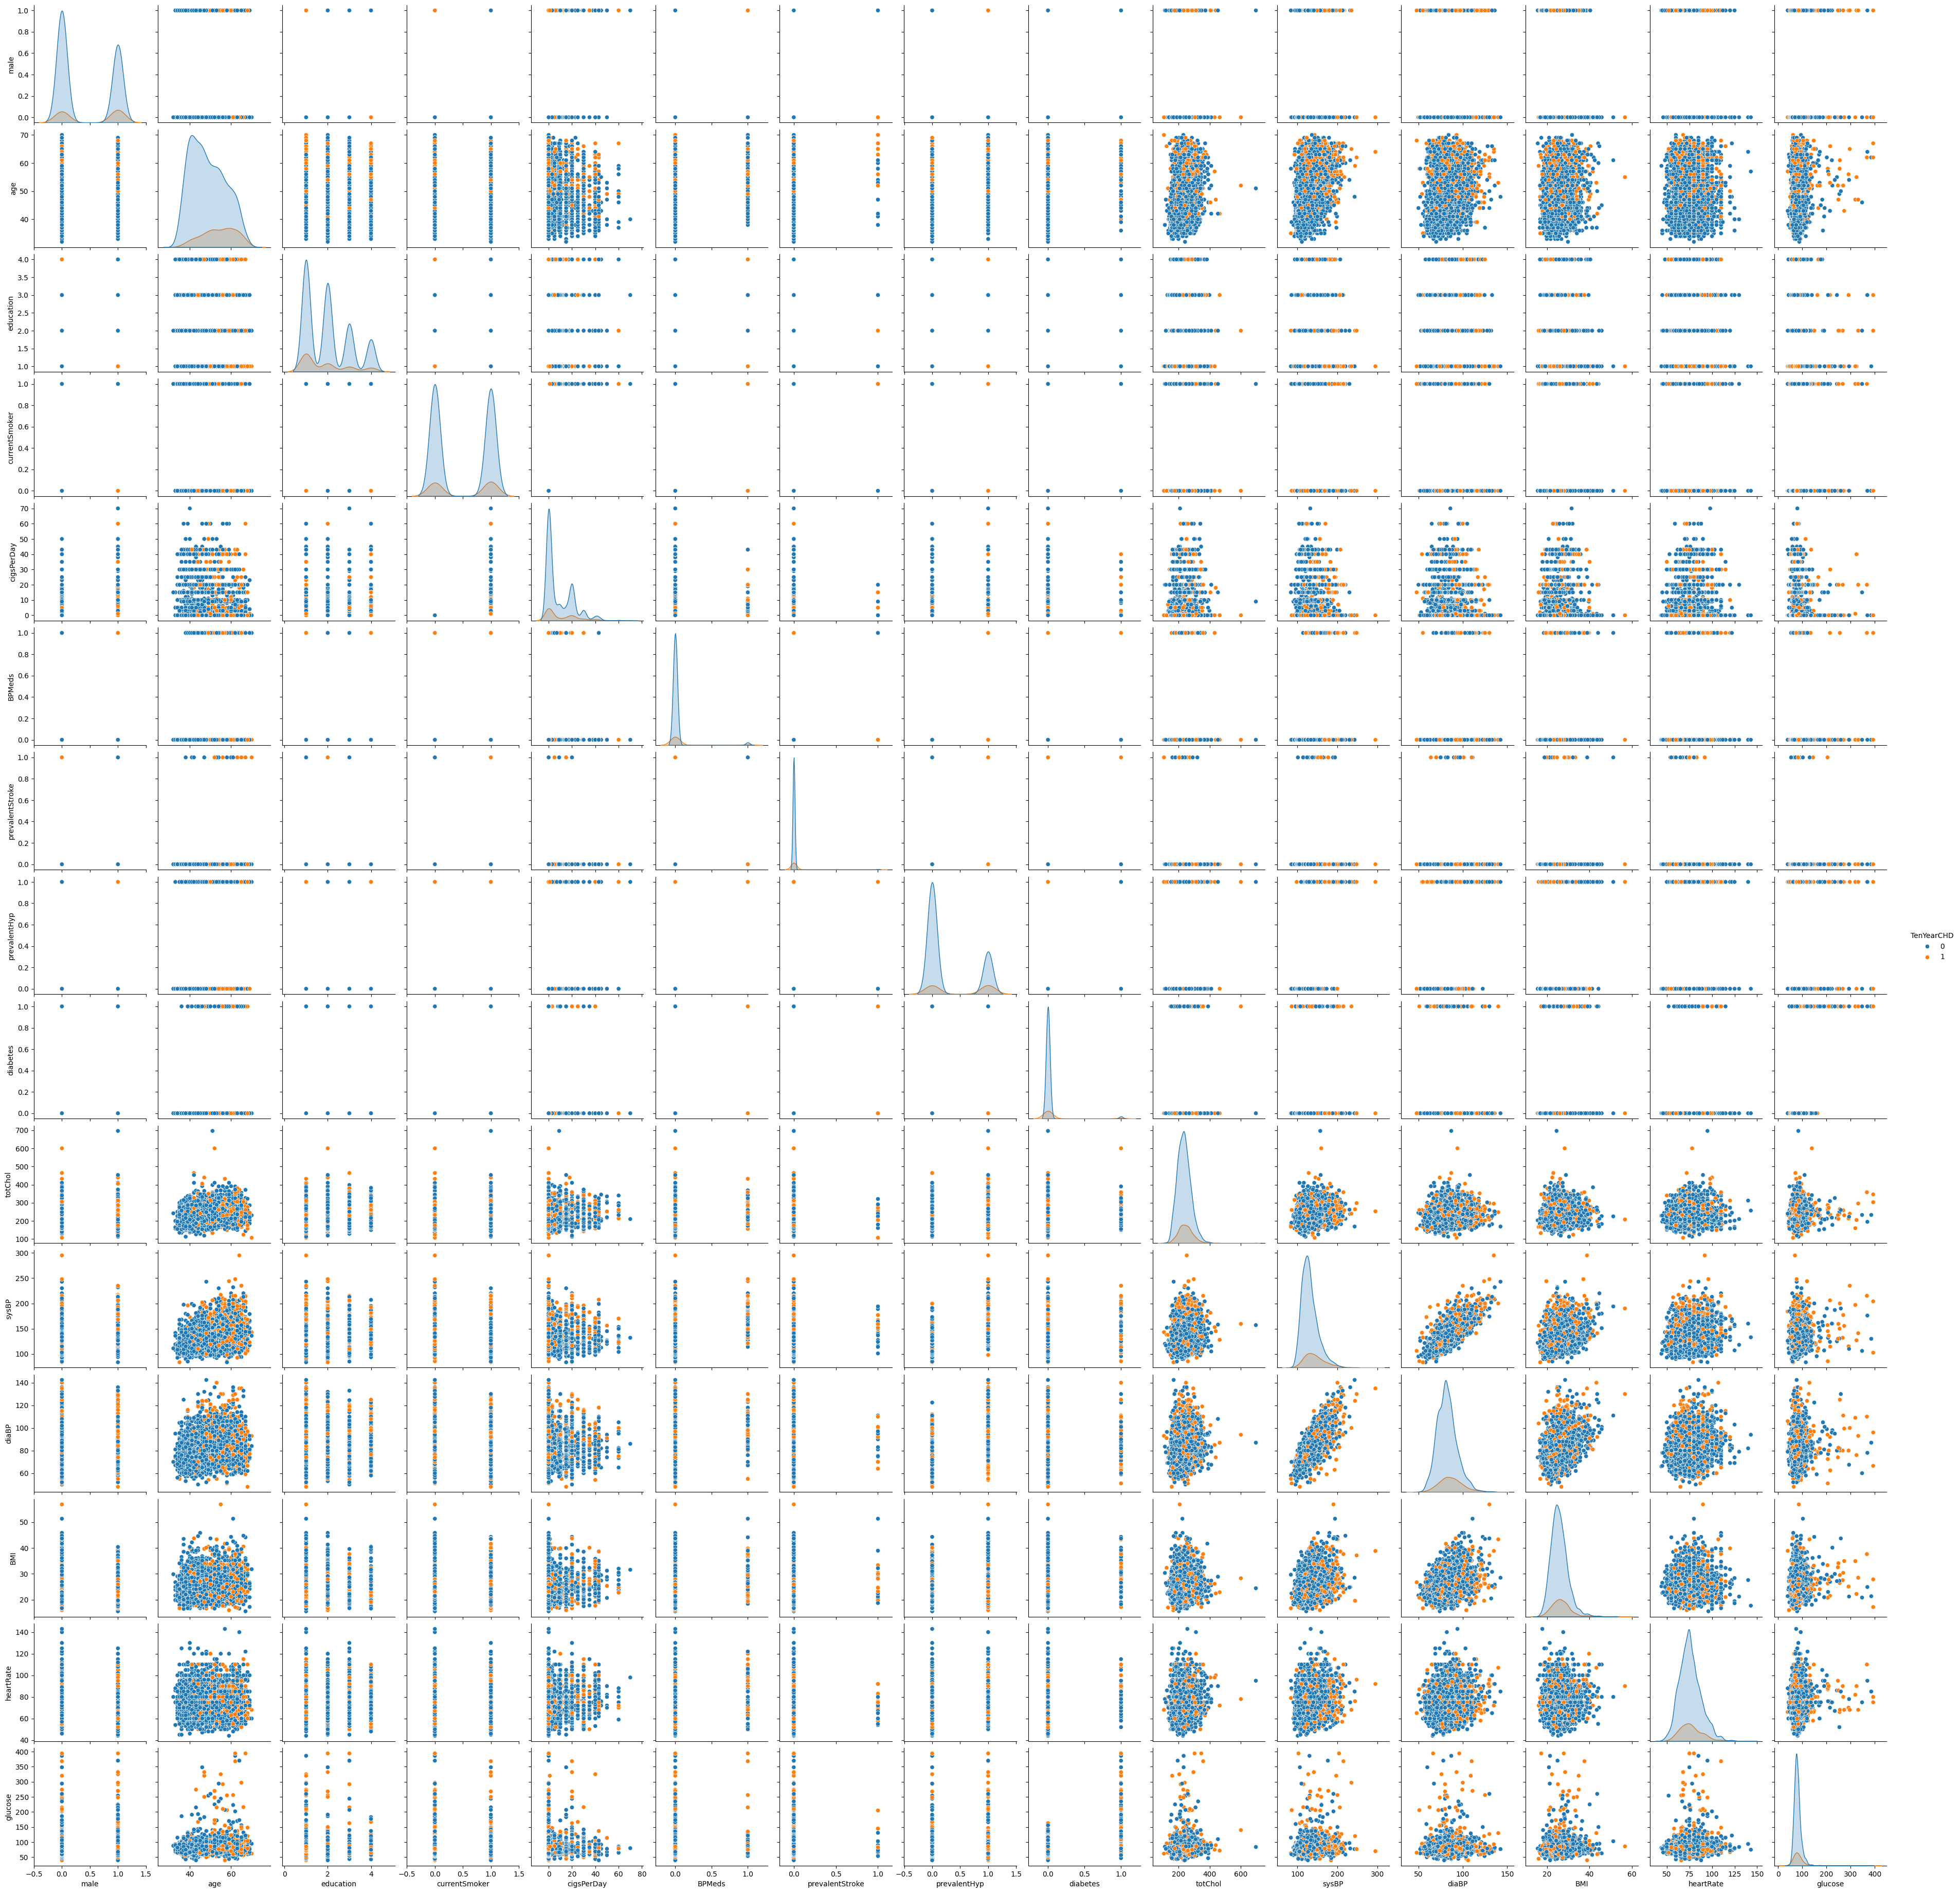

In [4]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue=target)

### Missing Value Imputation

In [13]:
print("which columns have a missing value? \n", df.isnull().any(axis=0))
print("\nhow many rows have a missing value?\n", df.isnull().any(axis=1).sum())
print("\n% of the missing rows?\n", df.isnull().any(axis=1).sum()/df.shape[0]*100)

df_nan = round(100*df.isna().sum()/df.shape[0],2)
index = df_nan.index
print("\nwhat percent of each column is missing?\n",pd.DataFrame({ '% NaN': df_nan}, index=index).T)

which columns have a missing value? 
 male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

how many rows have a missing value?
 582

% of the missing rows?
 13.732892873997168

what percent of each column is missing?
        male  age  education  currentSmoker  cigsPerDay  BPMeds  \
% NaN   0.0  0.0       2.48            0.0        0.68    1.25   

       prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  \
% NaN              0.0           0.0       0.0     1.18    0.0    0.0  0.45   

       heartRate  glucose  TenYearCHD  
% NaN       0.02     9.16         0.0  


Several features contain missing values in the dataset. The columns with missing data are `education`, `cigsPerDay`, `BPMeds`, `totChol`, `BMI`, `heartRate`, and `glucose`, while the remaining variables (including the label `TenYearCHD`) have no missing values. In total, **582 rows** contain at least one missing value, representing approximately **13.73%** of the dataset. Among all features, **`glucose` has the highest missing rate (9.16%)**, followed by `education` (2.48%), `BPMeds` (1.25%), and `totChol` (1.18%), while the other missing rates are below 1%. Since `glucose` has the highest missing rate (9.16%) and is strongly related to diabetes status and age, we imputed missing glucose values using group-based imputation: replacing missing entries with the median glucose value within each subgroup (e.g., grouped by `diabetes`, optionally further stratified by age bins). This preserves important population structure compared to global mean/median imputation.

In [16]:

# glucose
df["age_bin"] = pd.qcut(df["age"], q=5, duplicates="drop")
df["glucose"] = df["glucose"].fillna(
    df.groupby(["diabetes", "age_bin"])["glucose"].transform("median")
)

df["glucose"] = df["glucose"].fillna(df.groupby("diabetes")["glucose"].transform("median"))
df["glucose"] = df["glucose"].fillna(df["glucose"].median())

df.drop(columns=["age_bin"], inplace=True)

for col in df.columns:
    if df[col].isna().sum() > 0:   # only process columns with missing values
        if df[col].dtype in ["float64", "int64"]:
            fill_value = df[col].median()
            df[col] = df[col].fillna(fill_value)

pd.DataFrame({ '% NaN': df_nan}, index=index).T

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
% NaN,0.0,0.0,2.48,0.0,0.68,1.25,0.0,0.0,0.0,1.18,0.0,0.0,0.45,0.02,9.16,0.0


In [ ]:

# since all the missing ratio is really small, we will fill NA with median
# df_clean = df.apply(lambda col: col.fillna(col.median()))

# print("\nSummary stats:")
# print(X.describe().T[["mean", "std", "min", "max"]])

# corr = X.corr()
# corr